`Import Packages`

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

`Reading the data`

In [ ]:
df = pd.read_csv("dataset/FuelConsumption.csv")
df.head(5)

In [ ]:
df.describe()

`Visualization`

In [30]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [ ]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

`Make train and test data`

In [32]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [ ]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color='blue')
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

`Sklearn`

In [38]:
from sklearn import linear_model

In [44]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print(f"Coef = {regr.coef_} and Intercept = {regr.intercept_}")

Coef = [[38.38158109]] and Intercept = [127.28562474]


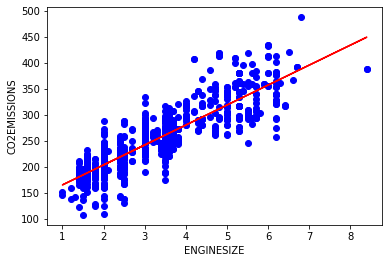

In [47]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
plt.plot(train_x,regr.coef_[0]*train_x+regr.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color='blue')
plt.plot(test_x,regr.coef_[0]*test_x+regr.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [50]:
from sklearn.metrics import r2_score

In [ ]:
test_y_ = regr.predict(test_x)
print(f"R2-score:{r2_score(test_y,test_y_)}")